In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', -1)
pd.set_option('display.expand_frame_repr', False)

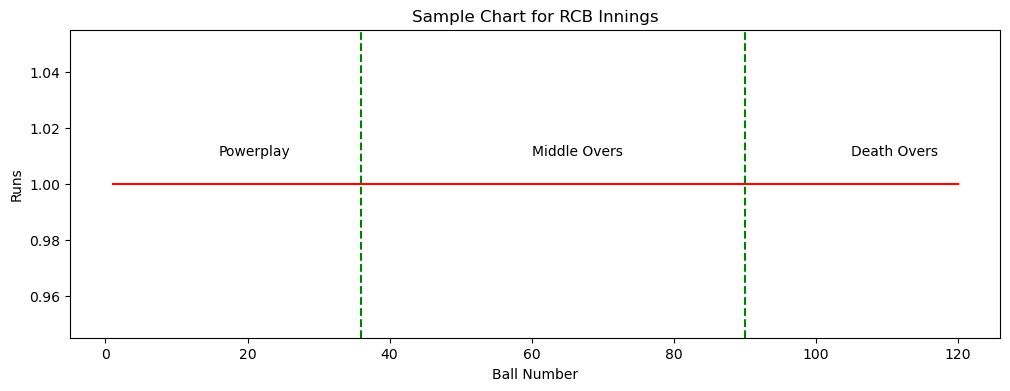

In [13]:
x = [i for i in range(1, 121)]
y = [1 for i in range(1, 121)]

plt.figure(figsize = (12, 4))
plt.plot(x, y, c = 'r')

plt.axvline(x = 36, ls = '--', c = 'g')
plt.axvline(x = 90, ls = '--', c = 'g')

plt.text(16, 1.01, "Powerplay")
plt.text(60, 1.01, "Middle Overs")
plt.text(105, 1.01, "Death Overs")

plt.xlabel("Ball Number")
plt.ylabel("Runs")
plt.title("Sample Chart for RCB Innings")
plt.show()

In [3]:
deliveries = pd.read_csv('Desktop\MAS\DATASET\MAS-ACA-Masterclass-main\MAS-ACA-Masterclass-main\CSV Files\deliveries_updated.csv')

In [4]:
df = deliveries.copy()

In [5]:
df['total_runs'] = df['batsman_runs'] + df['extras']

In [15]:
df.head()

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,total_runs
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1082591,1,0.3,0,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,1082591,1,0.4,0,4,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1082591,1,0.5,0,5,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2


In [28]:
def show_summary(df, matchID):

    df = df[df.matchId == matchID]

    df1 = df[df.inning == 1]
    df2 = df[df.inning == 2]

    df1.reset_index(inplace = True, drop = True)
    df2.reset_index(inplace = True, drop = True)

    df1['cum_runs'] = 0
    df2['cum_runs'] = 0

    runs_count = 0
    for i in range(len(df1)):
        runs_count += df1['total_runs'][i]
        df1['cum_runs'][i] = runs_count

    runs_count = 0
    for i in range(len(df2)):
        runs_count += df2['total_runs'][i]
        df2['cum_runs'][i] = runs_count

    ball_no_ing1 = [i for i in range(1, len(df1) + 1)]
    ball_no_ing2 = [i for i in range(1, len(df2) + 1)]

    wk_index1 = list(df1[~df1.player_dismissed.isna()].index)
    wk_index2 = list(df2[~df2.player_dismissed.isna()].index)

    wk_runs1 = list(df1[df1.index.isin(wk_index1)].cum_runs)
    wk_runs2 = list(df2[df2.index.isin(wk_index2)].cum_runs)

    team1 = df1.batting_team[0]
    team2 = df2.batting_team[0]

    plt.figure(figsize = (16, 6))

    plt.plot(ball_no_ing1, df1.cum_runs, linewidth = 3, label = team1)
    plt.plot(ball_no_ing2, df2.cum_runs, linewidth = 3, label = team2)

    plt.scatter(wk_index1, wk_runs1, s = 150)
    plt.scatter(wk_index2, wk_runs2, s = 150)

    plt.axvline(x = 36, ls = '--', c = 'g')
    plt.axvline(x = 90, ls = '--', c = 'g')

    plt.text(16, 1.01, "Powerplay")
    plt.text(60, 1.01, "Middle Overs")
    plt.text(105, 1.01, "Death Overs")

    plt.xlabel("Ball Number")
    plt.ylabel("Runs")
    plt.title("Match Summary - Runs progression Chart")
    plt.legend()

    plt.show()

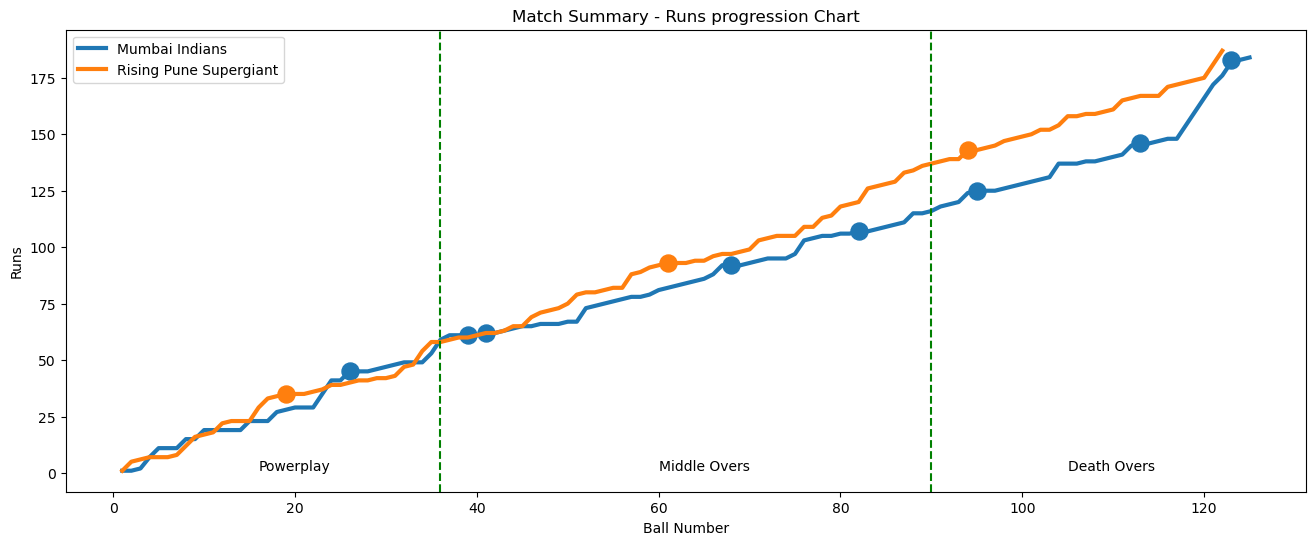

In [29]:
show_summary(df, 1082592)